In [10]:
# Importa las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('D:\\ejercios\\ejercio1\\unidad4\\cleanedData.csv')
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [12]:
df.shape

(316800, 27)

In [13]:
print(df.describe())

               Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  316800.000000  316800.000000  316800.000000            316800.000000   
mean        0.312500       0.500000       0.562500                 0.500000   
std         0.463513       0.500001       0.496079                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       0.500000       1.000000                 0.500000   
75%         1.000000       1.000000       1.000000                 1.000000   
max         1.000000       1.000000       1.000000                 1.000000   

         Sore-Throat   None_Sympton          Pains  Nasal-Congestion  \
count  316800.000000  316800.000000  316800.000000     316800.000000   
mean        0.312500       0.062500       0.363636          0.545455   
std         0.463513       0.242062       0.481046          0.497930   


In [14]:
print(df.groupby('Country').size())

Country
China                 31680
France                31680
Germany               31680
Iran                  31680
Italy                 31680
Other                 31680
Other-EUR             31680
Republic of Korean    31680
Spain                 31680
UAE                   31680
dtype: int64


In [15]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


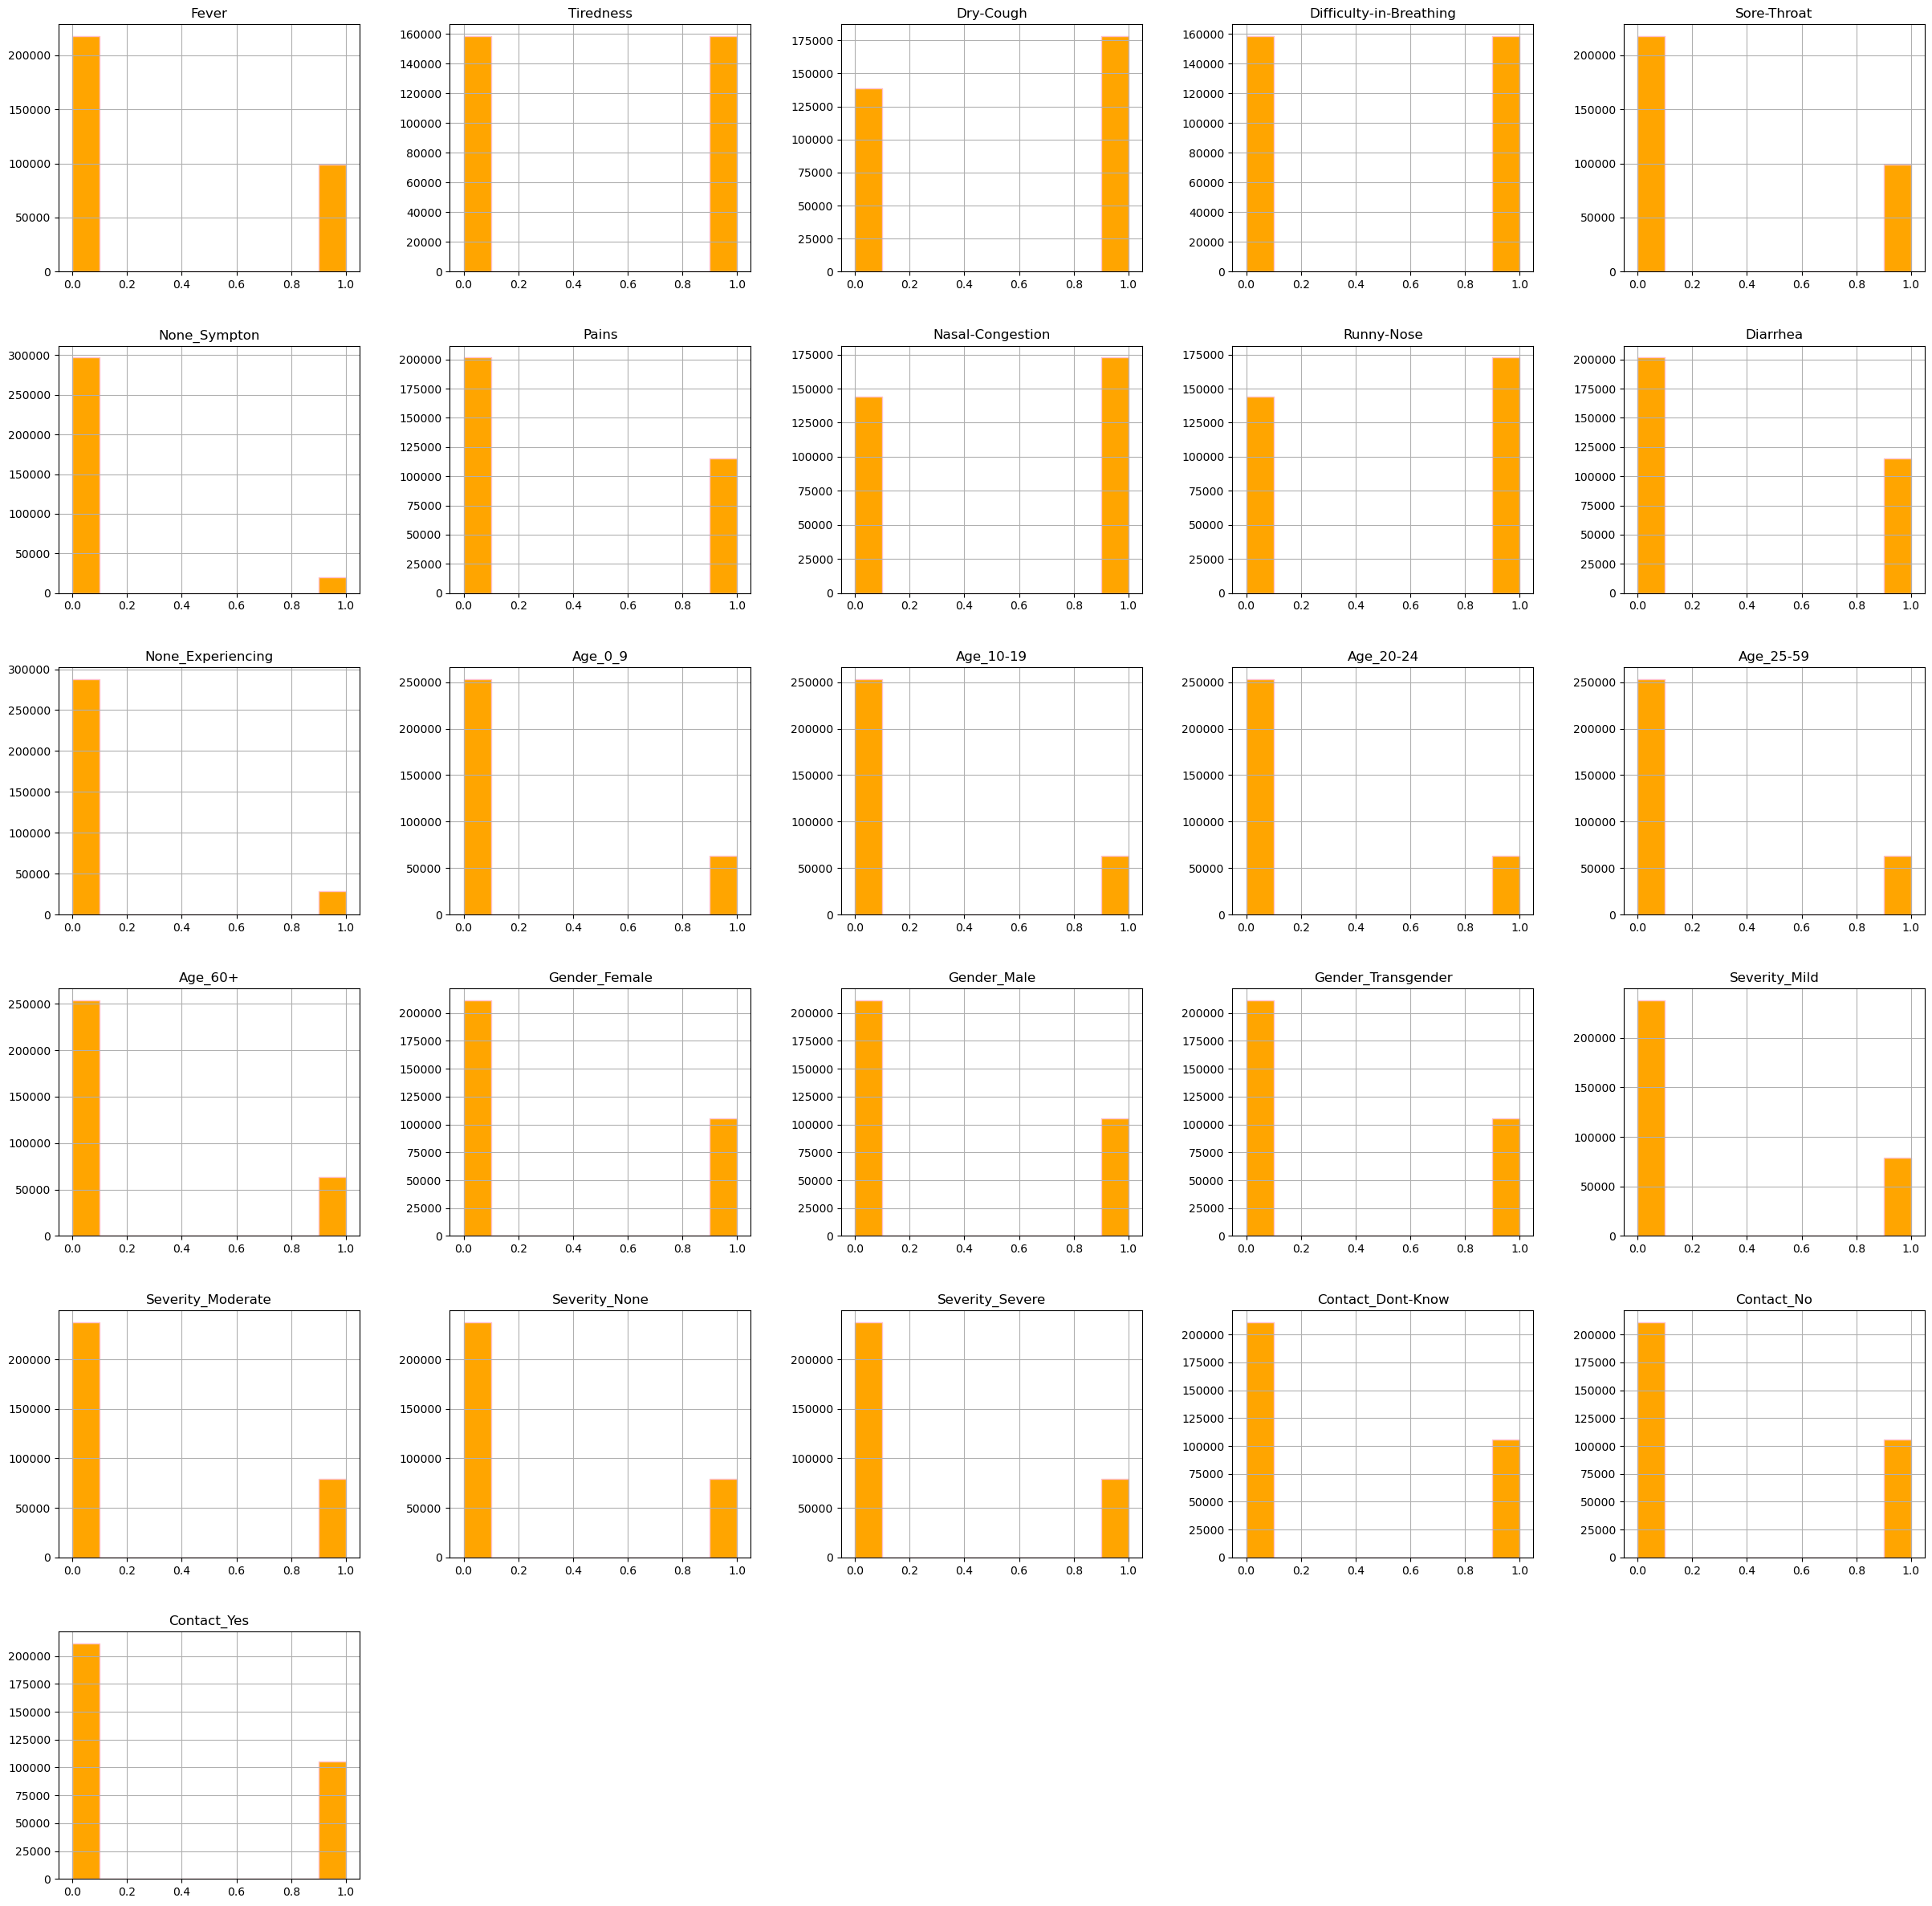

In [16]:
#histograma
df.hist(figsize=(30,30), edgecolor='pink', color='orange')
plt.show()

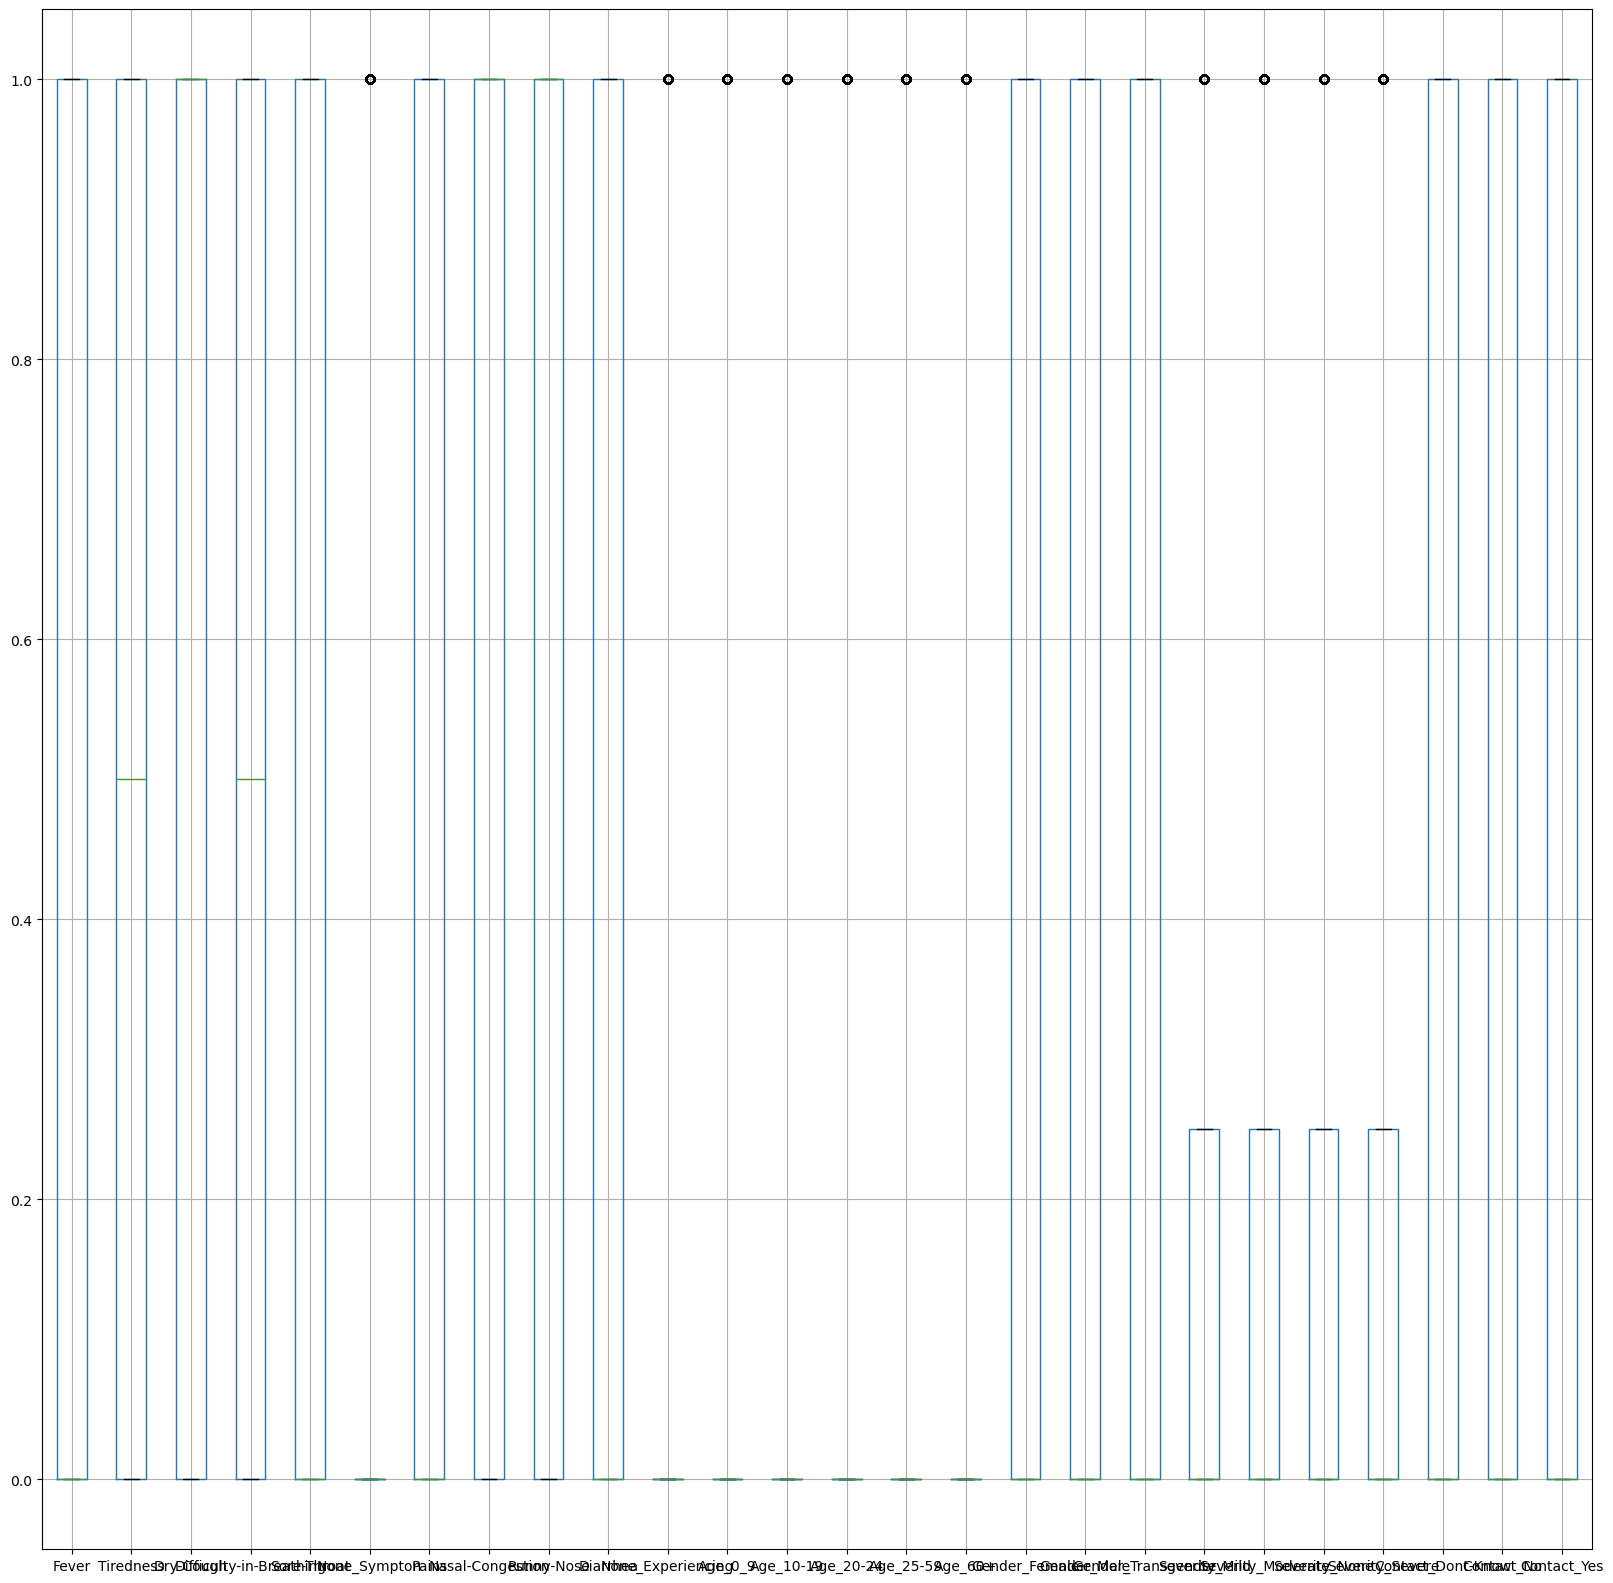

In [17]:
#el Boxplots
df.boxplot(figsize=(20,20))
plt.show()

In [18]:
print(df.columns)

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0_9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')


In [19]:
df [['Country', 'Contact_No']].head()

,Country,Contact_No
0,China,0
1,China,1
2,China,0
3,China,0
4,China,1


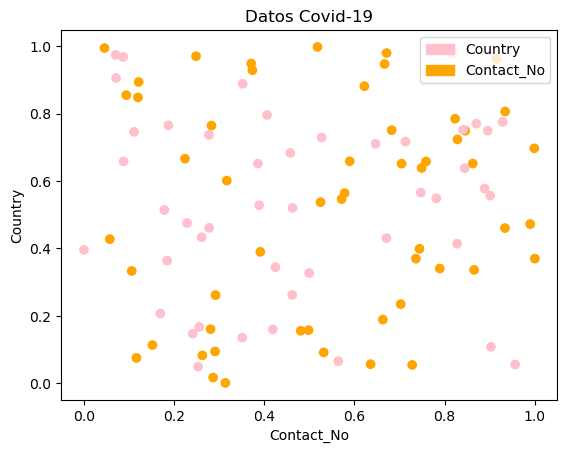

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Genera datos de ejemplo
x = np.random.rand(100, 2)  # Esto genera una matriz de 100 filas y 2 columnas
y = np.random.choice([0, 1], size=100)  # Esto genera etiquetas aleatorias 0 o 1

# Definir el mapeo de colores y la leyenda
color_map = {0: 'pink', 1: 'orange'}
label_map = {0: 'Country', 1: 'Contact_No'}

# Crear la lista de colores
colors = [color_map[c] for c in y]

# Visualización
plt.scatter(x[:, 0], x[:, 1], c=colors)

# Leyenda con mismos colores
handles = [mpatches.Patch(color=color_map[i], label=label_map[i]) for i in range(len(label_map))]
plt.legend(handles=handles)

# Etiquetas y título
plt.xlabel('Contact_No')
plt.ylabel('Country')
plt.title('Datos Covid-19')

# Mostrar el gráfico
plt.show()


In [21]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Filtrar DataFrame solo con columnas numéricas
numeric_df = df[numeric_columns]

# Calcular la correlación
correlation_matrix = numeric_df.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                                Fever     Tiredness     Dry-Cough  \
Fever                    1.000000e+00  4.045199e-01  5.096472e-02   
Tiredness                4.045199e-01  1.000000e+00  3.779645e-01   
Dry-Cough                5.096472e-02  3.779645e-01  1.000000e+00   
Difficulty-in-Breathing -1.348400e-01  4.629153e-17  3.779645e-01   
Sore-Throat             -1.636364e-01 -1.348400e-01  5.096472e-02   
None_Sympton            -1.740777e-01 -2.581989e-01 -2.927700e-01   
Pains                    2.336708e-17  2.612420e-17  4.519459e-18   
Nasal-Congestion        -8.120278e-17 -6.526807e-17 -5.180861e-17   
Runny-Nose              -1.708735e-16 -1.561936e-16 -9.767619e-17   
Diarrhea                -4.663218e-17 -5.916164e-17 -1.403602e-17   
None_Experiencing       -2.972693e-17 -2.497080e-17 -1.629225e-18   
Age_0_9                  6.959228e-16  4.505202e-16 -1.896458e-17   
Age_10-19                5.727470e-16  8.882113e-17  3.856237e-16   
Age_20-24               -4.855571e

In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [23]:
# Crear un clasificador Naive Bayes
naive_bayes = GaussianNB()

In [24]:
# Entrenar el clasificador Naive Bayes con los datos de entrenamiento
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [25]:
# Predecir con el conjunto de prueba
y_pred = naive_bayes.predict(x_test)

In [26]:
# Evaluar el rendimiento del clasificador Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", accuracy)

cf_matrix = confusion_matrix(y_test, y_pred)

Precision: 0.5


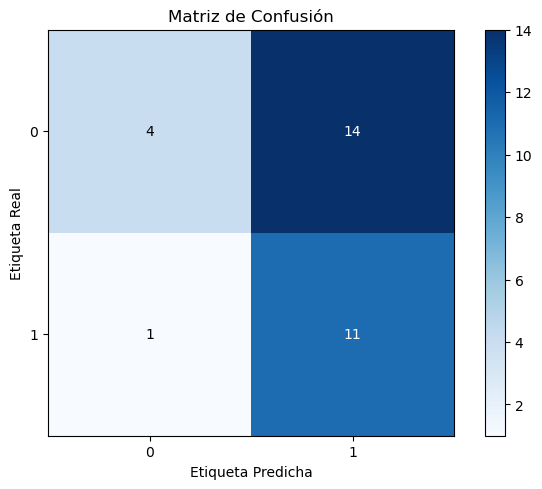

In [27]:
# Graficar la matriz de confusión
plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
fmt = 'd'
thresh = cf_matrix.max() / 2.

for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(j, i, format(cf_matrix[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


In [28]:
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Calcular y mostrar precision, recall y F1 Score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 Score: {}".format(fscore))

              precision    recall  f1-score   support

           0       0.80      0.22      0.35        18
           1       0.44      0.92      0.59        12

    accuracy                           0.50        30
   macro avg       0.62      0.57      0.47        30
weighted avg       0.66      0.50      0.45        30

Precision: 0.656
Recall: 0.5
F1 Score: 0.4465334900117509
